<a href="https://colab.research.google.com/github/KenDaupsey/-Panel-Data-Analysis-and-Model-Comparison-Using-Python-/blob/main/Panel_Data_Analysis_and_Model_Comparison_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Panel Data Analysis and Model Comparison Using Python ***

In [1]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
### Load dataset and examine first 5 rows
url= ("https://raw.githubusercontent.com/KenDaupsey/-Panel-Data-Analysis-and-Model-Comparison-Using-Python-/main/PanelDataWages1.csv")
df= pd.read_csv(url)
df.head()

,exp,wks,occ,ind,south,smsa,ms,fem,union,ed,...,id,t,tdum1,tdum2,tdum3,tdum4,tdum5,tdum6,tdum7,exp2
0,3,32,0,0,1,0,1,0,0,9,...,1,1,1,0,0,0,0,0,0,9
1,4,43,0,0,1,0,1,0,0,9,...,1,2,0,1,0,0,0,0,0,16
2,5,40,0,0,1,0,1,0,0,9,...,1,3,0,0,1,0,0,0,0,25
3,6,39,0,0,1,0,1,0,0,9,...,1,4,0,0,0,1,0,0,0,36
4,7,42,0,1,1,0,1,0,0,9,...,1,5,0,0,0,0,1,0,0,49


In [5]:
df.columns

Index(['exp', 'wks', 'occ', 'ind', 'south', 'smsa', 'ms', 'fem', 'union', 'ed',
       'blk', 'lwage', 'id', 't', 'tdum1', 'tdum2', 'tdum3', 'tdum4', 'tdum5',
       'tdum6', 'tdum7', 'exp2'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exp     4165 non-null   int64  
 1   wks     4165 non-null   int64  
 2   occ     4165 non-null   int64  
 3   ind     4165 non-null   int64  
 4   south   4165 non-null   int64  
 5   smsa    4165 non-null   int64  
 6   ms      4165 non-null   int64  
 7   fem     4165 non-null   int64  
 8   union   4165 non-null   int64  
 9   ed      4165 non-null   int64  
 10  blk     4165 non-null   int64  
 11  lwage   4165 non-null   float64
 12  id      4165 non-null   int64  
 13  t       4165 non-null   int64  
 14  tdum1   4165 non-null   int64  
 15  tdum2   4165 non-null   int64  
 16  tdum3   4165 non-null   int64  
 17  tdum4   4165 non-null   int64  
 18  tdum5   4165 non-null   int64  
 19  tdum6   4165 non-null   int64  
 20  tdum7   4165 non-null   int64  
 21  exp2    4165 non-null   int64  
dtype

In [7]:
# View summary statistics
print(df.describe())

               exp          wks          occ          ind        south  \
count  4165.000000  4165.000000  4165.000000  4165.000000  4165.000000   
mean     19.853782    46.811525     0.511164     0.395438     0.290276   
std      10.966370     5.129098     0.499935     0.489003     0.453944   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%      11.000000    46.000000     0.000000     0.000000     0.000000   
50%      18.000000    48.000000     1.000000     0.000000     0.000000   
75%      29.000000    50.000000     1.000000     1.000000     1.000000   
max      51.000000    52.000000     1.000000     1.000000     1.000000   

              smsa           ms          fem        union           ed  ...  \
count  4165.000000  4165.000000  4165.000000  4165.000000  4165.000000  ...   
mean      0.653782     0.814406     0.112605     0.363986    12.845378  ...   
std       0.475821     0.388826     0.316147     0.481202     2.787995  ...   
min       0.00000

In [8]:
# Create pooled OLS model
pooled_model = sm.OLS(endog=df['exp'], exog=df[['wks', 'occ', 'south', 'smsa', 'ms', 'fem', 'union', 'ed']])
pooled_results = pooled_model.fit()
print(pooled_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    exp   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              1770.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:18:37   Log-Likelihood:                         -15822.
No. Observations:                4165   AIC:                                  3.166e+04
Df Residuals:                    4157   BIC:                                  3.171e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Average Hourly Wage')

<Figure size 640x480 with 0 Axes>

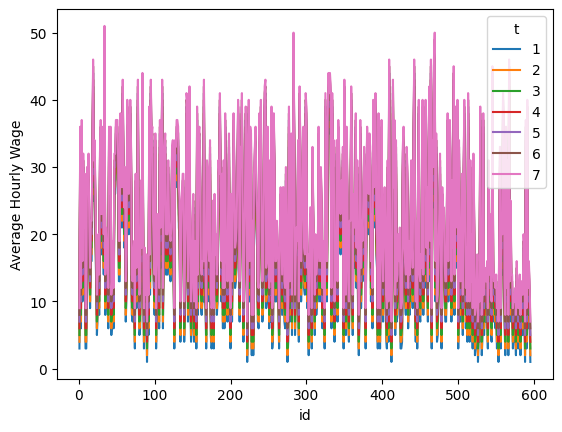

In [9]:
# Plot wage over time
plt.figure()
df.groupby(['id','t'])['exp'].mean().unstack().plot()
plt.ylabel('Average Hourly Wage')

In [10]:
# Fixed effects model controlling for entity (id)
fe_model = sm.OLS(endog=df['exp'], exog=df[['wks', 'occ', 'south', 'smsa', 'ms', 'fem', 'union', 'ed']], entity=df['id'])
fe_results = fe_model.fit()
print(fe_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    exp   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              1770.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:18:41   Log-Likelihood:                         -15822.
No. Observations:                4165   AIC:                                  3.166e+04
Df Residuals:                    4157   BIC:                                  3.171e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['entity']
  warnings.warn(msg, ValueWarning)


In [11]:
# Random effects model
re_model = sm.GLS(endog=df['exp'], exog=df[['wks', 'occ', 'south', 'smsa', 'ms', 'fem', 'union', 'ed']], groups=df['id'])
re_results = re_model.fit()
print(re_results.summary())

                                 GLS Regression Results                                
Dep. Variable:                    exp   R-squared (uncentered):                   0.773
Model:                            GLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              1770.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        18:18:43   Log-Likelihood:                         -15822.
No. Observations:                4165   AIC:                                  3.166e+04
Df Residuals:                    4157   BIC:                                  3.171e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['groups']
  warnings.warn(msg, ValueWarning)


In [12]:
# Hausman test for FE vs RE
hausman = sm.stats.anova_lm(fe_results, re_results)
print(hausman)

   df_resid            ssr  df_diff  ss_diff   F  Pr(>F)
0    4157.0  486155.932609      0.0      NaN NaN     NaN
1    4157.0  486155.932609     -0.0     -0.0 NaN     NaN


In [13]:
# Compare the models using AIC and BIC
results = pd.DataFrame({'Model': ['Pooled OLS', 'Fixed Effects', 'Random Effects'],
                        'AIC': [pooled_results.aic, fe_results.aic, re_results.aic],
                        'BIC': [pooled_results.bic, fe_results.bic, re_results.bic]})
results['ΔAIC'] = results['AIC'] - min(results['AIC'])
results['AIC Weight'] = np.exp(-0.5 * results['ΔAIC']) / np.sum(np.exp(-0.5 * results['ΔAIC']))
results = results.sort_values(by='AIC')

print(results)

            Model           AIC           BIC          ΔAIC  AIC Weight
0      Pooled OLS  31660.379734  31711.055506  0.000000e+00    0.333333
1   Fixed Effects  31660.379734  31711.055506  0.000000e+00    0.333333
2  Random Effects  31660.379734  31711.055506  7.275958e-12    0.333333


*** Panel Data Analysis and Model Comparison Using Python ~ Entire Code ***

In [ ]:
### Panel Data Analysis and Model Comparison Using Python ~ Entire Code

### Import Necessary Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Load dataset and examine first 5 rows
url= ("https://raw.githubusercontent.com/KenDaupsey/-Panel-Data-Analysis-and-Model-Comparison-Using-Python-/main/PanelDataWages1.csv")
df= pd.read_csv(url)
df.head()

df.columns

df.info()

# View summary statistics
print(df.describe())

# Create pooled OLS model
pooled_model = sm.OLS(endog=df['exp'], exog=df[['wks', 'occ', 'south', 'smsa', 'ms', 'fem', 'union', 'ed']])
pooled_results = pooled_model.fit()
print(pooled_results.summary())

# Plot wage over time
plt.figure()
df.groupby(['id','t'])['exp'].mean().unstack().plot()
plt.ylabel('Average Hourly Wage')

# Fixed effects model controlling for entity (id)
fe_model = sm.OLS(endog=df['exp'], exog=df[['wks', 'occ', 'south', 'smsa', 'ms', 'fem', 'union', 'ed']], entity=df['id'])
fe_results = fe_model.fit()
print(fe_results.summary())

# Random effects model
re_model = sm.GLS(endog=df['exp'], exog=df[['wks', 'occ', 'south', 'smsa', 'ms', 'fem', 'union', 'ed']], groups=df['id'])
re_results = re_model.fit()
print(re_results.summary())

# Hausman test for FE vs RE
hausman = sm.stats.anova_lm(fe_results, re_results)
print(hausman)

# Compare the models using AIC and BIC
results = pd.DataFrame({'Model': ['Pooled OLS', 'Fixed Effects', 'Random Effects'],
                        'AIC': [pooled_results.aic, fe_results.aic, re_results.aic],
                        'BIC': [pooled_results.bic, fe_results.bic, re_results.bic]})
results['ΔAIC'] = results['AIC'] - min(results['AIC'])
results['AIC Weight'] = np.exp(-0.5 * results['ΔAIC']) / np.sum(np.exp(-0.5 * results['ΔAIC']))
results = results.sort_values(by='AIC')

print(results)